In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


import pandas as pd
df = pd.read_csv("AirPassengers - AirPassengers.csv", parse_dates=['Month'], index_col='Month')
data = df['#Passengers']

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

def calc_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

C:\Users\Quest\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Quest\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Quest\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1,1,1) Summary:
                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -526.123
Date:                Thu, 27 Nov 2025   AIC                           1058.246
Time:                        23:21:55   BIC                           1066.454
Sample:                    01-01-1949   HQIC                          1061.577
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5111      0.114     -4.488      0.000      -0.734      -0.288
ma.L1          0.9144      0.056     16.251      0.000       0.804       1.025
sigma2       592.7851    101.2

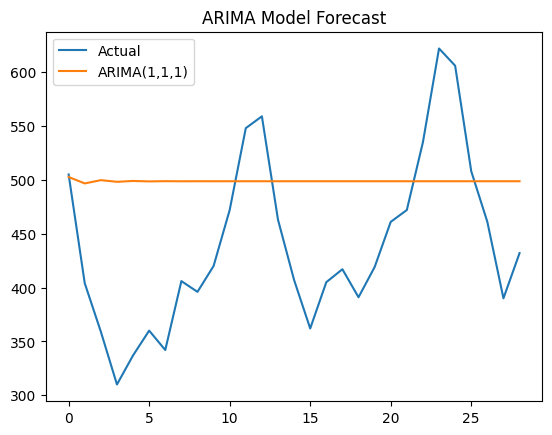

In [2]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# i. Initialize ARIMA model with p, d, q parameters
# p=1 (AR terms), d=1 (differencing), q=1 (MA terms)
arima_model = ARIMA(train, order=(1, 1, 1))

# ii. Train the model
arima_fit = arima_model.fit()
print(f"ARIMA(1,1,1) Summary:\n{arima_fit.summary()}")

# iii. Generate forecasts
arima_pred = arima_fit.forecast(steps=len(test))
print("ARIMA Metrics:", calc_metrics(test, arima_pred))

plt.plot(test.values, label='Actual')
plt.plot(arima_pred.values, label='ARIMA(1,1,1)')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()